# Import libraries:

The dataset can be downloaded from (https://www.kaggle.com/c/facebook-recruiting-iv-human-or-bot/data) or https://drive.google.com/drive/folders/1vXUVwal2sGqNn-uINu2D0lnor-Dljq-R?usp=sharing

In [1]:
import pandas as pd
import numpy as np
import sklearn.preprocessing as preprocessing
from matplotlib import pyplot as plt
# CHange root folder here as path to the data files
root_folder = '~/Desktop/facebook-recruiting-iv-human-or-bot/''

### train_data & test_data exploratory analysis

In [2]:
# read train and test bidders data into a DataFrame
train = pd.read_csv(root_folder + 'train.csv')
test = pd.read_csv(root_folder + 'test.csv')

In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2013 entries, 0 to 2012
Data columns (total 4 columns):
bidder_id          2013 non-null object
payment_account    2013 non-null object
address            2013 non-null object
outcome            2013 non-null float64
dtypes: float64(1), object(3)
memory usage: 63.0+ KB


In [4]:
# display the first 5 rows
print("The first 5 rows of Train Data is: \n")
train.head()

The first 5 rows of Train Data is: 



,bidder_id,payment_account,address,outcome
0,91a3c57b13234af24875c56fb7e2b2f4rb56a,a3d2de7675556553a5f08e4c88d2c228754av,a3d2de7675556553a5f08e4c88d2c228vt0u4,0.0
1,624f258b49e77713fc34034560f93fb3hu3jo,a3d2de7675556553a5f08e4c88d2c228v1sga,ae87054e5a97a8f840a3991d12611fdcrfbq3,0.0
2,1c5f4fc669099bfbfac515cd26997bd12ruaj,a3d2de7675556553a5f08e4c88d2c2280cybl,92520288b50f03907041887884ba49c0cl0pd,0.0
3,4bee9aba2abda51bf43d639013d6efe12iycd,51d80e233f7b6a7dfdee484a3c120f3b2ita8,4cb9717c8ad7e88a9a284989dd79b98dbevyi,0.0
4,4ab12bc61c82ddd9c2d65e60555808acqgos1,a3d2de7675556553a5f08e4c88d2c22857ddh,2a96c3ce94b3be921e0296097b88b56a7x1ji,0.0


### Descriptive statistics: Train Data

Number of total bidders: 2,013
Number of human bidders: 1,910
Number of bot bidders: 103
Proportion of human bidders: 94.88%
Proportion of bot bidders: 5.12%


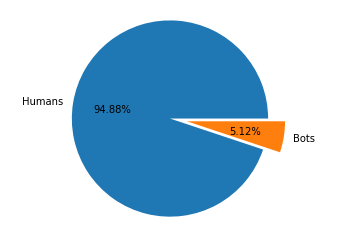

In [5]:
# Totals
total_bidders = len(train)
number_of_human_bidders = len(train[train['outcome'] == 0.0])
number_of_bot_bidders = total_bidders - number_of_human_bidders

# Proportions
human_bidders_proportion = number_of_human_bidders / total_bidders
bot_bidders_proportion = number_of_bot_bidders / total_bidders

# Statistics
print("Number of total bidders: {:,}".format(total_bidders))
print("Number of human bidders: {:,}".format(number_of_human_bidders))
print("Number of bot bidders: {:,}".format(number_of_bot_bidders))
print("Proportion of human bidders: {:.2%}".format(human_bidders_proportion))
print("Proportion of bot bidders: {:.2%}".format(bot_bidders_proportion))

#visualization 
_, ax = plt.subplots()

# Pie chart parameters
pie_data = [number_of_human_bidders, number_of_bot_bidders]
pie_labels = ('Humans', 'Bots')
pie_labels_explode_coefficients = (0, 0.175)

# Show the chart
ax.pie(pie_data, labels=pie_labels, autopct='%1.2f%%', shadow=False, explode=pie_labels_explode_coefficients)
plt.axis('equal')
plt.show()



In [6]:
# display the first 5 rows
print("The first 5 rows of Test Data is: \n")
test.head()

The first 5 rows of Test Data is: 



,bidder_id,payment_account,address
0,49bb5a3c944b8fc337981cc7a9ccae41u31d7,a3d2de7675556553a5f08e4c88d2c228htx90,5d9fa1b71f992e7c7a106ce4b07a0a754le7c
1,a921612b85a1494456e74c09393ccb65ylp4y,a3d2de7675556553a5f08e4c88d2c228rs17i,a3d2de7675556553a5f08e4c88d2c228klidn
2,6b601e72a4d264dab9ace9d7b229b47479v6i,925381cce086b8cc9594eee1c77edf665zjpl,a3d2de7675556553a5f08e4c88d2c228aght0
3,eaf0ed0afc9689779417274b4791726cn5udi,a3d2de7675556553a5f08e4c88d2c228nclv5,b5714de1fd69d4a0d2e39d59e53fe9e15vwat
4,cdecd8d02ed8c6037e38042c7745f688mx5sf,a3d2de7675556553a5f08e4c88d2c228dtdkd,c3b363a3c3b838d58c85acf0fc9964cb4pnfa


### Bids exploratory analysis

In [7]:
# read the bids datasets 
bids = pd.read_csv(root_folder + 'bids.csv')
#bids.fillna('-', inplace=True) #replace NaN values with a dash as NaN are string categories we don't know
#bids = bids.sort_values(by=['auction', 'time']) #sort the bids of auction and time

In [8]:
bids.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7656334 entries, 0 to 7656333
Data columns (total 9 columns):
bid_id         int64
bidder_id      object
auction        object
merchandise    object
device         object
time           int64
country        object
ip             object
url            object
dtypes: int64(2), object(7)
memory usage: 525.7+ MB


In [9]:
# display the first 5 rows
print("The first 5 rows of bids Data is: \n")
bids.head()

The first 5 rows of bids Data is: 



,bid_id,bidder_id,auction,merchandise,device,time,country,ip,url
0,0,8dac2b259fd1c6d1120e519fb1ac14fbqvax8,ewmzr,jewelry,phone0,9759243157894736,us,69.166.231.58,vasstdc27m7nks3
1,1,668d393e858e8126275433046bbd35c6tywop,aeqok,furniture,phone1,9759243157894736,in,50.201.125.84,jmqlhflrzwuay9c
2,2,aa5f360084278b35d746fa6af3a7a1a5ra3xe,wa00e,home goods,phone2,9759243157894736,py,112.54.208.157,vasstdc27m7nks3
3,3,3939ac3ef7d472a59a9c5f893dd3e39fh9ofi,jefix,jewelry,phone4,9759243157894736,in,18.99.175.133,vasstdc27m7nks3
4,4,8393c48eaf4b8fa96886edc7cf27b372dsibi,jefix,jewelry,phone5,9759243157894736,in,145.138.5.37,vasstdc27m7nks3


### Descriptive statistics: Bids Data

In [10]:
# Totals
total_bids = len(bids)
total_auctions = len(set(bids['auction']))
total_bidders_in_bids_dataframe = len(set(bids['bidder_id']))
total_devices = len(set(bids['device']))
total_countries = len(set(bids['country']))
total_ips = len(set(bids['ip']))
total_urls = len(set(bids['url']))
total_merchandise_categories = len(set(bids['merchandise']))

print("Number of bids: {:,}".format(total_bids))
print("Number of auctions: {:,}".format(total_auctions))
print("Number of total bidders in bids dataset: {:,}".format(total_bidders_in_bids_dataframe))
print("Number of devices: {:,}".format(total_devices))
print("Number of countries: {:,}".format(total_countries))
print("Number of IPs: {:,}".format(total_ips))
print("Number of URLs: {:,}".format(total_urls))
print("Number of merchandise categories: {:,}".format(total_merchandise_categories))

Number of bids: 7,656,334
Number of auctions: 15,051
Number of total bidders in bids dataset: 6,614
Number of devices: 7,351
Number of countries: 200
Number of IPs: 2,303,991
Number of URLs: 1,786,351
Number of merchandise categories: 10


In [11]:
data_per_user = bids.groupby(['bidder_id'])

def get_user_statistics_per_feature(feature_column):
    return data_per_user[feature_column].nunique()

def print_user_statistics_per_feature(feature_name, feature_per_user):
    mean_feature_per_user = feature_per_user.mean()
    median_feature_per_user = feature_per_user.median()
    mode_feature_per_user = feature_per_user.mode()
    max_feature_per_user = feature_per_user.max()
    min_feature_per_user = feature_per_user.min()
    
    print("Average number of {} per user: {}".format(feature_name, mean_feature_per_user))
    print("Median of {} per user: {}".format(feature_name, median_feature_per_user))
    print("Mode of {} per user: {}".format(feature_name, mode_feature_per_user[0]))
    print("User with more {}: {}".format(feature_name, max_feature_per_user))
    print("User with less {}: {}".format(feature_name, min_feature_per_user))
    print("************************************************************")
    
    return feature_per_user

features_per_user = {}
for feat, column in [('auctions', 'auction'), ('bids', 'bid_id'), ('countries', 'country'), ('IPs', 'ip'), ('devices', 'device'), ('urls', 'url')]:
    features_per_user[column] = get_user_statistics_per_feature(column)
    print_user_statistics_per_feature(feat, features_per_user[column])
          
bids_per_user = features_per_user['bid_id'] / features_per_user['auction']
average_response_time_per_user = data_per_user['time'].apply(lambda x: x.diff().mean()).fillna(0)

Average number of auctions per user: 57.807831871787116
Median of auctions per user: 10.0
Mode of auctions per user: 1
User with more auctions: 1726
User with less auctions: 1
************************************************************
Average number of bids per user: 1157.595101300272
Median of bids per user: 18.0
Mode of bids per user: 1
User with more bids: 515033
User with less bids: 1
************************************************************
Average number of countries per user: 12.72422134865437
Median of countries per user: 3.0
Mode of countries per user: 1
User with more countries: 178
User with less countries: 0
************************************************************
Average number of IPs per user: 544.0963108557605
Median of IPs per user: 12.0
Mode of IPs per user: 1
User with more IPs: 111918
User with less IPs: 1
************************************************************
Average number of devices per user: 73.43755669791352
Median of devices per user: 8.0
Mode of

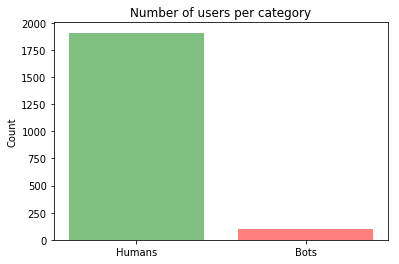

In [12]:
# number of humans vs bots
y_pos = np.arange(len(pie_labels))
plt.bar(y_pos, pie_data, align='center', alpha=0.5, color=['green', 'red'])
plt.xticks(y_pos, pie_labels)
plt.ylabel('Count')
plt.title('Number of users per category')

plt.show()

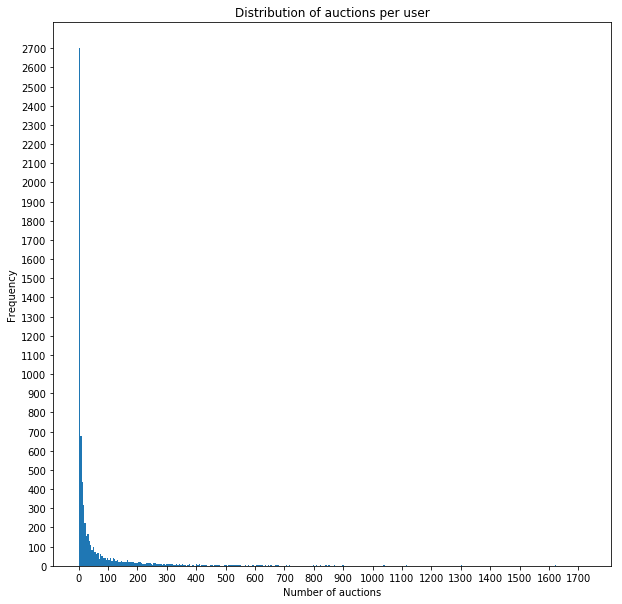

In [13]:
# Distribution of auctions per user
plt.figure(figsize=(10,10))
plt.hist(features_per_user['auction'], bins='auto')
plt.yticks(range(0, 2800, 100))
plt.xticks(range(0, 1800, 100))
plt.title("Distribution of auctions per user")
plt.xlabel("Number of auctions")
plt.ylabel("Frequency")
plt.show()


We can see that most of the users participate in less than 10 auctions as the distribution is skewed to the left. Also, it is visible that less than 50 users participate in 100 auctions or more.

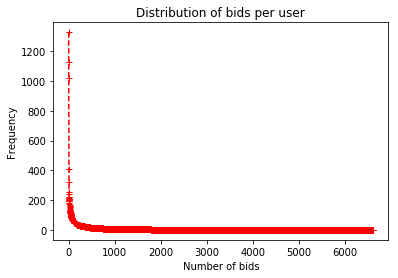

In [14]:
# Distribution of bids per user
plt.plot(sorted(bids_per_user.values, reverse=True), 'r+--')
plt.title("Distribution of bids per user")
plt.xlabel("Number of bids")
plt.ylabel("Frequency")
plt.show()

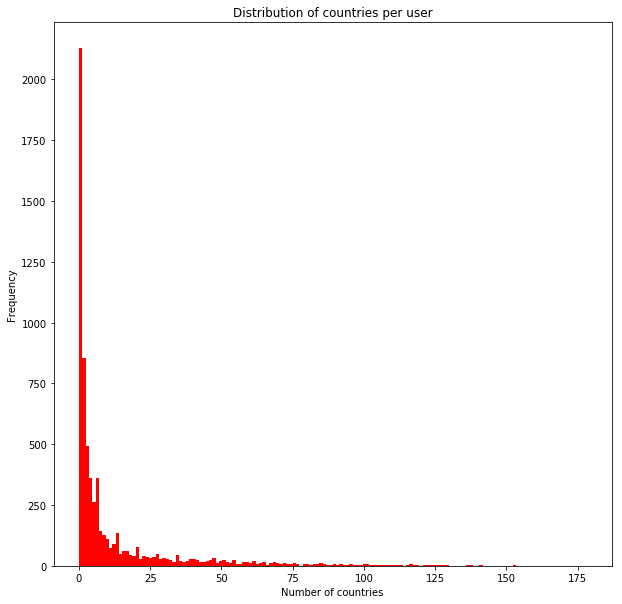

In [15]:
# Distribution of countries per user
plt.figure(figsize=(10,10))
plt.hist(features_per_user['country'], bins='auto', color='red')
plt.title("Distribution of countries per user")
plt.xlabel("Number of countries")
plt.ylabel("Frequency")
plt.show()

We can see that most of the data is located at the left side of the graph, which means most of the users bidded from less than two countries. 

In [24]:
# percentage breakdown of merchandise categories bid on, by bots
bids_1 = pd.merge(train, bids, on='bidder_id', how='left')
merch = bids_1[bids_1['outcome'] == 1].groupby('merchandise').size()
merch.sort_values()

merchandise
books and music       1509
office equipment      7967
computers            11667
home goods           18708
jewelry              37101
mobile              105138
sporting goods      230326
dtype: int64

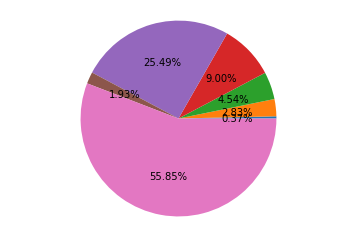

In [25]:
_, ax = plt.subplots()
# Pie chart parameters
pie_data = merch
# Show the chart
ax.pie(pie_data, autopct='%1.2f%%', shadow=False)
plt.axis('equal')
plt.show()

Plot of percentage of merchandise categories bid by bots

In [26]:
# percentage breakdown of countries bots bid from
country = bids_1[bids_1['outcome'] == 1].groupby('country').size()
country.sort_values()

country
zz        1
tl        1
tc        1
an        1
gq        1
gi        1
gb        1
bz        1
td        2
gp        2
pg        3
fj        3
bt        3
mc        4
kg        4
ga        4
ad        4
li        5
bm        5
mp        5
bb        5
sc        5
re        6
ag        6
ne        7
aw        7
je        7
bs        7
vi        8
cg        8
      ...  
ar     2486
sg     2780
ua     2875
nl     2910
cn     3109
at     3407
it     3480
fr     3748
es     3872
br     3932
ph     4818
ke     5385
sa     5626
kr     6340
tr     6676
ng     6852
vn     7696
jp     7921
au     8634
uk     8782
ca     9205
my    10488
mx    10848
ru    11100
za    13364
th    17282
de    18530
id    20495
us    66663
in    86386
Length: 191, dtype: int64

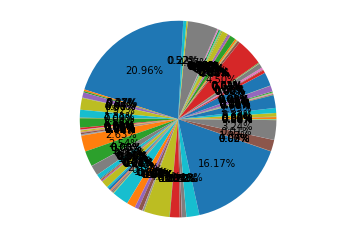

In [27]:
_, ax = plt.subplots()
# Pie chart parameters
pie_data = country
# Show the chart
ax.pie(pie_data, autopct='%1.2f%%', shadow=False)
plt.axis('equal')
plt.show()

Plot of percentage of countries bots bid from

In [29]:
# bids per auction per bidder id
bids_per_auction = bids_1.groupby(['auction', 'bidder_id']).size()
bids_per_auction = bids_per_auction.to_frame()
bids_per_auction.head()

0
auction bidder_id                                 
00270   2d38a6af2ce96c1446f900aa4756b8975y9k3    5
        384ba7c5a8ccf55d174080d9ad7de9b8mfysi    1
        5dda8ade6b5d4065f3119a381516c227yoz8y    2
        84c4b58a1491da3a30710bcdf61f87054xfq6    7
        9655ccc7c0c193f1549475f02c54dce45kjw7  827

In [30]:
# calculating time difference betwwen bid by a bidder
bids_1 = bids_1.sort_values(by=['time'])
bids_1['timediffs'] = bids_1.groupby('bidder_id')['time'].transform(pd.Series.diff)
bids_1.head()

,bidder_id,payment_account,address,outcome,bid_id,auction,merchandise,device,time,country,ip,url,timediffs
1021717,6e178db6d17d21aa88aaca5bf15c2761lc500,a3d2de7675556553a5f08e4c88d2c228mqaf6,0d11440b07e5e2c8550af74b728ab4edk47gk,0.0,2351200.0,jqx39,jewelry,phone99,9.631917e+15,sa,174.12.78.255,omwhmwzvrn6ycq6,NaN
485371,3d7cff3dedd8a8e02dbc551c6a61da3bibbvh,8afafc0824f86e8af8017e037396311cqqxtb,5e0db345d781856edfdd20895e7e190dq6zs1,1.0,2351194.0,5mqsv,home goods,phone4,9.631917e+15,vn,235.207.16.31,vasstdc27m7nks3,NaN
73636,d65efaa8129a85f85bf909e5abde8c3628gfv,2981750fbed3b561685afdf5f8bd484b499cn,a3d2de7675556553a5f08e4c88d2c2282r3s6,0.0,2351193.0,i01xm,jewelry,phone13,9.631917e+15,sg,113.217.213.15,eovsi6u99d9b72w,NaN
255212,76218e14c379c12d599dae9e1c00b61a3i5b2,a3d2de7675556553a5f08e4c88d2c228sjo4q,ca8d4b018cb62966eebb2974f5a83b4fstk6z,0.0,2351187.0,6hpvy,sporting goods,phone1161,9.631917e+15,cz,121.169.96.51,f33fl83l4vrg6is,NaN
2193832,f5b2bbad20d1d7ded3ed960393bec0f40u6hn,a3d2de7675556553a5f08e4c88d2c228sezhf,a3d2de7675556553a5f08e4c88d2c228nfhse,0.0,2351190.0,fagyq,sporting goods,phone1,9.631917e+15,in,161.192.187.34,3skc4v2r07bneta,NaN


In [43]:
# ip's to total bids ratio per bidder id 
ip_bids_ratio = bids_1.groupby('bidder_id')['ip'].nunique()/bids_1.groupby('bidder_id')['bid_id'].nunique()
ip_bids_ratio = ip_bids_ratio.to_frame()
ip_bids_ratio = ip_bids_ratio.reset_index()
ip_bids_ratio.head()

,bidder_id,0
0,001068c415025a009fee375a12cff4fcnht8y,1.000000
1,0030a2dd87ad2733e0873062e4f83954mkj86,1.000000
2,00a0517965f18610417ee784a05f494d4dw6e,0.730496
3,00cc97158e6f4cb8eac3c0075918b7ffi5k8o,1.000000
4,01067975436d123f717ee5aba0dd4bbfa0937,0.732965


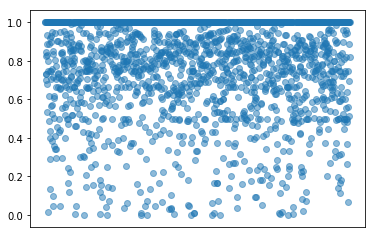

In [46]:
plt.scatter(ip_bids_ratio['bidder_id'],ip_bids_ratio[0], alpha=0.5)
plt.xticks([])
plt.show()

Scatter Plot showing number of ip to bids ratio

# Features creation

In [17]:
# Join 2 datasets together (-1 outcome meaning unknown i.e. test)
test['outcome'] = -1 # -1 makes test outcome as 'unknown'
bidders = pd.concat((train, test))

bidders.head()

,bidder_id,payment_account,address,outcome
0,91a3c57b13234af24875c56fb7e2b2f4rb56a,a3d2de7675556553a5f08e4c88d2c228754av,a3d2de7675556553a5f08e4c88d2c228vt0u4,0.0
1,624f258b49e77713fc34034560f93fb3hu3jo,a3d2de7675556553a5f08e4c88d2c228v1sga,ae87054e5a97a8f840a3991d12611fdcrfbq3,0.0
2,1c5f4fc669099bfbfac515cd26997bd12ruaj,a3d2de7675556553a5f08e4c88d2c2280cybl,92520288b50f03907041887884ba49c0cl0pd,0.0
3,4bee9aba2abda51bf43d639013d6efe12iycd,51d80e233f7b6a7dfdee484a3c120f3b2ita8,4cb9717c8ad7e88a9a284989dd79b98dbevyi,0.0
4,4ab12bc61c82ddd9c2d65e60555808acqgos1,a3d2de7675556553a5f08e4c88d2c22857ddh,2a96c3ce94b3be921e0296097b88b56a7x1ji,0.0


.

In [18]:
#bidders['total_bids'] = 0
#for bidder in bidders['bidder_id']:
    #total_bids = bids[bids.bidder_id == bidder].count()[0]
    #bidders.loc[bidders[bidders.bidder_id == bidder].index, 'total_bids'] = total_bids


In [19]:
data_per_user = bids.groupby(['bidder_id'])

auctions_per_user = data_per_user['auction'].nunique().to_frame()
bids_per_user = data_per_user['bid_id'].count().to_frame()
countries_per_user = data_per_user['country'].nunique().to_frame()
ips_per_user = data_per_user['ip'].nunique().to_frame()
bids_per_auction_ratio_per_user = (bids_per_user['bid_id'] / auctions_per_user['auction']).to_frame()
average_response_time_per_user = data_per_user['time'].apply(lambda x: x.diff().mean()).fillna(0).to_frame()
# number of bids a user made per auction
bids_per_auction = bids.groupby(['auction', 'bidder_id']).size()
bids_per_auction = bids_per_auction.to_frame()

features_per_bidder = auctions_per_user.join(bids_per_user).join(countries_per_user).join(ips_per_user).join(
        bids_per_auction_ratio_per_user).join(average_response_time_per_user)
features_per_bidder.head()

,auction,bid_id,country,ip,0,time
bidder_id,,,,,,
001068c415025a009fee375a12cff4fcnht8y,1,1,1,1,1.000000,0.000000e+00
002d229ffb247009810828f648afc2ef593rb,1,2,1,1,2.000000,1.052632e+08
0030a2dd87ad2733e0873062e4f83954mkj86,1,1,1,1,1.000000,0.000000e+00
003180b29c6a5f8f1d84a6b7b6f7be57tjj1o,3,3,1,3,1.000000,3.297784e+13
00486a11dff552c4bd7696265724ff81yeo9v,13,20,1,10,1.538462,4.018413e+12


In [20]:
def rename_features(df, name_mapping):
        df.rename(columns=name_mapping, inplace=True)
        return features_per_bidder

In [21]:
 rename_features(features_per_bidder, {'auction': 'auctions_per_user',
                                        'bid_id': 'bids_per_user',
                                        'country': 'countries_per_user',
                                        'ip': 'ips_per_user',
                                        0: 'bids_auction_ratio',
                                        'time': 'average_response_time'})

,auctions_per_user,bids_per_user,countries_per_user,ips_per_user,bids_auction_ratio,average_response_time
bidder_id,,,,,,
001068c415025a009fee375a12cff4fcnht8y,1,1,1,1,1.000000,0.000000e+00
002d229ffb247009810828f648afc2ef593rb,1,2,1,1,2.000000,1.052632e+08
0030a2dd87ad2733e0873062e4f83954mkj86,1,1,1,1,1.000000,0.000000e+00
003180b29c6a5f8f1d84a6b7b6f7be57tjj1o,3,3,1,3,1.000000,3.297784e+13
00486a11dff552c4bd7696265724ff81yeo9v,13,20,1,10,1.538462,4.018413e+12
0051aef3fdeacdadba664b9b3b07e04e4coc6,5,68,4,10,13.600000,1.635106e+11
0053b78cde37c4384a20d2da9aa4272aym4pb,408,10939,73,1951,26.811275,7.065316e+09
0061edfc5b07ff3d70d693883a38d370oy4fs,38,134,4,53,3.526316,1.022327e+11
00862324eb508ca5202b6d4e5f1a80fc3t3lp,1,5,1,1,5.000000,7.631579e+08


In [22]:
newTrainData= train.join(features_per_bidder, how="left", on="bidder_id").fillna(0)
newTrainData.head()

,bidder_id,payment_account,address,outcome,auctions_per_user,bids_per_user,countries_per_user,ips_per_user,bids_auction_ratio,average_response_time
0,91a3c57b13234af24875c56fb7e2b2f4rb56a,a3d2de7675556553a5f08e4c88d2c228754av,a3d2de7675556553a5f08e4c88d2c228vt0u4,0.0,18.0,24.0,6.0,20.0,1.333333,5.711121e+11
1,624f258b49e77713fc34034560f93fb3hu3jo,a3d2de7675556553a5f08e4c88d2c228v1sga,ae87054e5a97a8f840a3991d12611fdcrfbq3,0.0,1.0,3.0,1.0,3.0,3.000000,3.233579e+12
2,1c5f4fc669099bfbfac515cd26997bd12ruaj,a3d2de7675556553a5f08e4c88d2c2280cybl,92520288b50f03907041887884ba49c0cl0pd,0.0,4.0,4.0,1.0,4.0,1.000000,2.379000e+12
3,4bee9aba2abda51bf43d639013d6efe12iycd,51d80e233f7b6a7dfdee484a3c120f3b2ita8,4cb9717c8ad7e88a9a284989dd79b98dbevyi,0.0,1.0,1.0,1.0,1.0,1.000000,0.000000e+00
4,4ab12bc61c82ddd9c2d65e60555808acqgos1,a3d2de7675556553a5f08e4c88d2c22857ddh,2a96c3ce94b3be921e0296097b88b56a7x1ji,0.0,23.0,155.0,2.0,123.0,6.739130,7.777888e+10


In [23]:
newTestData= test.join(features_per_bidder, how="left", on="bidder_id").fillna(0)
newTestData.head()

,bidder_id,payment_account,address,outcome,auctions_per_user,bids_per_user,countries_per_user,ips_per_user,bids_auction_ratio,average_response_time
0,49bb5a3c944b8fc337981cc7a9ccae41u31d7,a3d2de7675556553a5f08e4c88d2c228htx90,5d9fa1b71f992e7c7a106ce4b07a0a754le7c,-1,3.0,4.0,3.0,4.0,1.333333,2.340789e+13
1,a921612b85a1494456e74c09393ccb65ylp4y,a3d2de7675556553a5f08e4c88d2c228rs17i,a3d2de7675556553a5f08e4c88d2c228klidn,-1,2.0,3.0,2.0,2.0,1.500000,3.800103e+13
2,6b601e72a4d264dab9ace9d7b229b47479v6i,925381cce086b8cc9594eee1c77edf665zjpl,a3d2de7675556553a5f08e4c88d2c228aght0,-1,14.0,17.0,3.0,4.0,1.214286,1.819079e+10
3,eaf0ed0afc9689779417274b4791726cn5udi,a3d2de7675556553a5f08e4c88d2c228nclv5,b5714de1fd69d4a0d2e39d59e53fe9e15vwat,-1,90.0,148.0,14.0,129.0,1.644444,5.205553e+11
4,cdecd8d02ed8c6037e38042c7745f688mx5sf,a3d2de7675556553a5f08e4c88d2c228dtdkd,c3b363a3c3b838d58c85acf0fc9964cb4pnfa,-1,20.0,23.0,2.0,17.0,1.150000,2.988541e+11


In [24]:
del newTrainData['address']
del newTrainData['payment_account']

del newTestData['address']
del newTestData['payment_account']

In [25]:
newTrainData.head()

,bidder_id,outcome,auctions_per_user,bids_per_user,countries_per_user,ips_per_user,bids_auction_ratio,average_response_time
0,91a3c57b13234af24875c56fb7e2b2f4rb56a,0.0,18.0,24.0,6.0,20.0,1.333333,5.711121e+11
1,624f258b49e77713fc34034560f93fb3hu3jo,0.0,1.0,3.0,1.0,3.0,3.000000,3.233579e+12
2,1c5f4fc669099bfbfac515cd26997bd12ruaj,0.0,4.0,4.0,1.0,4.0,1.000000,2.379000e+12
3,4bee9aba2abda51bf43d639013d6efe12iycd,0.0,1.0,1.0,1.0,1.0,1.000000,0.000000e+00
4,4ab12bc61c82ddd9c2d65e60555808acqgos1,0.0,23.0,155.0,2.0,123.0,6.739130,7.777888e+10


In [26]:
newTestData.head()

,bidder_id,outcome,auctions_per_user,bids_per_user,countries_per_user,ips_per_user,bids_auction_ratio,average_response_time
0,49bb5a3c944b8fc337981cc7a9ccae41u31d7,-1,3.0,4.0,3.0,4.0,1.333333,2.340789e+13
1,a921612b85a1494456e74c09393ccb65ylp4y,-1,2.0,3.0,2.0,2.0,1.500000,3.800103e+13
2,6b601e72a4d264dab9ace9d7b229b47479v6i,-1,14.0,17.0,3.0,4.0,1.214286,1.819079e+10
3,eaf0ed0afc9689779417274b4791726cn5udi,-1,90.0,148.0,14.0,129.0,1.644444,5.205553e+11
4,cdecd8d02ed8c6037e38042c7745f688mx5sf,-1,20.0,23.0,2.0,17.0,1.150000,2.988541e+11


/////-----------------------NEW FEATURES----------------------------------------------------////////

## Prepare & Split Data for Visualisation:

In [51]:
import pickle
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

In [52]:
# Prepare: TRAIN & TEST DATA
def prepare_train_and_test_data():
    train_data = newTrainData
    features = ['auctions_per_user', 'bids_per_user', 'countries_per_user', 'ips_per_user','bids_auction_ratio','average_response_time']
    labels = ['outcome']
    train_features = np.array(train_data[features])
    train_labels  = np.array(train_data[labels]).ravel()
    
    scaling features:
    train_features = preprocessing.MinMaxScaler().fit_transform(train_features)
    
    X_train, X_validation, y_train, y_validation = train_test_split(train_features, train_labels, test_size=0.33,random_state=42)
    
    data = {'X_train': X_train,
            'y_train': y_train,
            'X_validation': X_validation,
            'y_validation': y_validation}

    
    with open("train.p", "wb") as f:    #train.p will have prepared-train_data
        pickle.dump(data, f)
    
    test_data = newTestData
    test_features = np.array(test_data[features])
    test_features = preprocessing.MinMaxScaler().fit_transform(test_features)
    with open("test.p", "wb") as f:       #test.p will have prepared-test_data
        pickle.dump({'test_data': test,
                     'X_test': test_features}, f)

In [53]:
if __name__ == "__main__":
    prepare_train_and_test_data()

## Training the classifiers with prepared TRAIN-DATA

In [54]:
from operator import itemgetter
from pprint import pprint
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score



In [55]:
def train_model():
    model_classifiers = [{'name': 'Random Forest',
                              'classifier': RandomForestClassifier(),
                              'grid': {'n_estimators': (10, 20, 25, 50, 75, 100),
                                       'criterion': ('gini', 'entropy'),
                                       'min_samples_split': (2, 3, 5, 10),
                                       'min_samples_leaf': (1, 2, 5),
                                       'verbose': (1,),
                                       'n_jobs': (-1,)},
                              'score': 0.0},
                            
                         {'name': 'Gradient Boosting',
                              'classifier': GradientBoostingClassifier(),
                              'grid': {'loss': ('deviance', 'exponential'),
                                       'learning_rate': (0.1, 0.01, 0.005),
                                       'n_estimators': (10, 25, 50, 75, 100),
                                       'criterion': ('friedman_mse', 'mse', 'mae'),
                                       'min_samples_split': (2, 3, 5, 10),
                                       'min_samples_leaf': (1, 2, 5),
                                       'verbose': (1,)},
                              'score': 0.0},
                         
                         {'name': 'Decision Tree',
                              'classifier': DecisionTreeClassifier(),
                              'grid': {'criterion': ('gini', 'entropy'),
                                       'splitter': ('best', 'random'),
                                       'min_samples_split': (2, 3, 5, 10),
                                       'min_samples_leaf': (1, 2, 5)},
                              'score': 0.0},
                                 
                         {'name': 'SVC',
                              'classifier': SVC(),
                              'grid': {'kernel': ('rbf', 'poly', 'linear', 'sigmoid'),
                                       'degree': (3, 4, 5),
                                       'C': (1.0, 0.5, 0.001, 1.5)},
                              'score': 0.0},
                             
                         {'name': 'Logistic Regression',
                              'classifier': LogisticRegression(),
                              'grid': {'C': (1.0, 0.5, 0.001, 1.5)},
                              'score': 0.0},
                        
                         {'name': 'k-Nearest Neighbors',
                              'classifier': KNeighborsClassifier(),
                              'grid': {'n_neighbors': (2, 3, 5, 10, 50),
                                       'weights': ('uniform', 'distance'),
                                       'algorithm': ('auto', 'ball_tree', 'kd_tree', 'brute'),
                                       'p': (1, 2, 3)},
                              'score': 0.0}]
    
    with open("train.p", "rb") as f:
        data = pickle.load(f)
        X_train = data['X_train']
        y_train = data['y_train']
        X_validation = data['X_validation']
        y_validation = data['y_validation']
    
    for candidate in model_classifiers:
        print(candidate['name'])

        candidate['classifier'].fit(X_train, y_train)
        predictions = candidate['classifier'].predict(X_validation)
        candidate['score'] = roc_auc_score(y_validation, predictions)

        print("-----------------****************************-----------------------------")
        print("Score: ", candidate['score'])
        print("Accuracy: ", candidate['classifier'].score(X_validation, y_validation))
        print("-----------------****************************-----------------------------\n")

    top_classifier = sorted(model_classifiers, key=itemgetter('score'), reverse=True)[:3]
    pprint(top_classifier[0])
    #pprint(top_3_classifiers[1])
    #pprint(top_3_classifiers[2])
    
    with open("top_classifier.p", "wb") as f:   #top_3_classifiers.p = will have 3 best classifiers
        pickle.dump(top_classifier, f)

In [56]:
if __name__ == "__main__":
    train_model()

Random Forest
-----------------****************************-----------------------------
Score:  0.5921702211690364
Accuracy:  0.9578947368421052
-----------------****************************-----------------------------

Gradient Boosting
-----------------****************************-----------------------------
Score:  0.6062154423380727
Accuracy:  0.956390977443609
-----------------****************************-----------------------------

Decision Tree
-----------------****************************-----------------------------
Score:  0.6388724328593997
Accuracy:  0.9338345864661655
-----------------****************************-----------------------------

SVC
-----------------****************************-----------------------------
Score:  0.5
Accuracy:  0.9518796992481203
-----------------****************************-----------------------------

Logistic Regression
-----------------****************************-----------------------------
Score:  0.5
Accuracy:  0.95187969924812

/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


## Submission: Using best model_classifiers on Test-features

In [57]:
from sklearn.metrics import accuracy_score

with open("train.p", "rb") as f:
        data = pickle.load(f)
        X_train = data['X_train']
        y_train = data['y_train']
        X_validation = data['X_validation']
        y_validation = data['y_validation']
        


gb = GradientBoostingClassifier(n_estimators=100, max_depth=5, max_features='log2',
                                max_leaf_nodes=9)
gb.fit(X_train, y_train)

y_pred = gb.predict(X_validation)
print(f"Gradient Boosting Accuracy: {accuracy_score(y_pred, y_validation):.3f}")

Gradient Boosting Accuracy: 0.956


In [58]:
bids = pd.read_csv(root_folder + 'bids.csv')
test = pd.read_csv(root_folder + 'test.csv')
test['outcome'] = -1
test = test.dropna()
bids = pd.merge(test, bids, on='bidder_id', how='left')

data_per_user = bids.groupby(['bidder_id'])

auctions_per_user = data_per_user['auction'].nunique().to_frame()
bids_per_user = data_per_user['bid_id'].count().to_frame()
countries_per_user = data_per_user['country'].nunique().to_frame()
ips_per_user = data_per_user['ip'].nunique().to_frame()
bids_per_auction_ratio_per_user = (bids_per_user['bid_id'] / auctions_per_user['auction']).to_frame()
average_response_time_per_user = data_per_user['time'].apply(lambda x: x.diff().mean()).fillna(0).to_frame()


features_per_bidder = auctions_per_user.join(bids_per_user).join(countries_per_user).join(ips_per_user).join(
        bids_per_auction_ratio_per_user).join(average_response_time_per_user)

features_per_bidder.head()

def rename_features(df, name_mapping):
        df.rename(columns=name_mapping, inplace=True)
        return features_per_bidder
    
rename_features(features_per_bidder, {'auction': 'auctions_per_user',
                                        'bid_id': 'bids_per_user',
                                        'country': 'countries_per_user',
                                        'ip': 'ips_per_user',
                                        0: 'bids_auction_ratio',
                                        'time': 'average_response_time'})

,auctions_per_user,bids_per_user,countries_per_user,ips_per_user,bids_auction_ratio,average_response_time
bidder_id,,,,,,
002d229ffb247009810828f648afc2ef593rb,1,2,1,1,2.000000,1.052632e+08
003180b29c6a5f8f1d84a6b7b6f7be57tjj1o,3,3,1,3,1.000000,3.297784e+13
00486a11dff552c4bd7696265724ff81yeo9v,13,20,1,10,1.538462,4.018413e+12
0051aef3fdeacdadba664b9b3b07e04e4coc6,5,68,4,10,13.600000,1.635106e+11
0053b78cde37c4384a20d2da9aa4272aym4pb,408,10939,73,1951,26.811275,7.065316e+09
0061edfc5b07ff3d70d693883a38d370oy4fs,38,134,4,53,3.526316,1.022327e+11
00862324eb508ca5202b6d4e5f1a80fc3t3lp,1,5,1,1,5.000000,7.631579e+08
009479273c288b1dd096dc3087653499lrx3c,1,1,1,1,1.000000,0.000000e+00
009cee781e8414f7fb55b2f92157e9dbu0y6o,2,5,3,5,2.500000,1.607411e+13


In [59]:
features_per_bidder = features_per_bidder.fillna(0)
features = ['auctions_per_user', 'bids_per_user', 'countries_per_user', 'ips_per_user','bids_auction_ratio','average_response_time']

X= features_per_bidder[features]

y_pred_test = gb.predict(X)

In [60]:
features_per_bidder['prediction'] = y_pred_test
a = features_per_bidder['prediction']
a.to_csv('submission.csv')

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.
  This is separate from the ipykernel package so we can avoid doing imports until


In [61]:
features_per_bidder['prediction'].head()

bidder_id
002d229ffb247009810828f648afc2ef593rb    0.0
003180b29c6a5f8f1d84a6b7b6f7be57tjj1o    0.0
00486a11dff552c4bd7696265724ff81yeo9v    0.0
0051aef3fdeacdadba664b9b3b07e04e4coc6    0.0
0053b78cde37c4384a20d2da9aa4272aym4pb    0.0
Name: prediction, dtype: float64